In [1]:
import rsmine.coarsegrainer.cg_optimisers as cg_opt
from rsmine.coarsegrainer.cg_utils import *
from rsmine.coarsegrainer.analysis_utils import *
sys.path.append(os.pardir)
from rsmine.mi_estimator.MI_estimators import VBMI

from examples.AB_prepare_dataset import edges, nodes, nodepos, order_8, G, prepare_data
from analyse_codes import *

examples_dir = '.'
regions_data_dir = examples_dir + '/quasiperiodic_data/regions/'

cm = 1/2.54  # convert inches to centimeters


/Users/efe/Documents/Research/RSMI-NE/rsmine/coarsegrainer/build_dataset.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
case_no = 37 # to get the sigma^1 V graph
V_index = 389

EV_params, data_params, cGV_edges, cGE_edges = prepare_data(V_index)
EV_params['case_no'] = case_no


/Users/efe/Documents/Research/RSMI-NE/examples/AB_prepare_dataset.py:37: RuntimeWarning: invalid value encountered in double_scalars
  r = (vec[0]*ref_vec[0]+vec[1]*ref_vec[1])/(np.linalg.norm(vec)*np.linalg.norm(ref_vec))


In [3]:
######### Loading the (PRE-EXISTING) E,V data samples ##########
samples = [10705]  # EV_params['sample_seeds']

EV_dir = sample_data_dir = os.path.join('data', 'EandV')  #os.path.join(os.pardir, 'data', 'EandV') 

Es_list=[]
Vs_list=[]

for sample in samples:
    Es_list.append(np.load(os.path.join(EV_dir,"Es_%i_vi%i_c%i.npy" % (sample,EV_params['V_index'],EV_params['case_no']))))
    Vs_list.append(np.load(os.path.join(EV_dir,"Vs_%i_vi%i_c%i.npy" % (sample,EV_params['V_index'],EV_params['case_no']))))
        
Es = np.reshape(Es_list,newshape=(len(Es_list)*Es_list[0].shape[0],Es_list[0].shape[1]))
Vs = np.reshape(Vs_list,newshape=(len(Vs_list)*Vs_list[0].shape[0],Vs_list[0].shape[1], 1)) # REMEMBER about the additional axis for Vs !!!!!
print("shapes: ", Es.shape,Vs.shape)

data_params['N_samples'] = len(Vs) 
print('len(Vs): ',len(Vs))

shapes:  (50000, 616) (50000, 24, 1)
len(Vs):  50000


In [4]:
nsize = 10
l_width = 2.0
dw_eps = 0.5
ncolor = 'black'
ccolor = 'dark_orange'

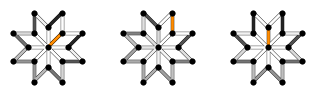

In [5]:
id = 10  # 1 #10 #3

num_cols = 3
figsize = (3.6*num_cols*cm, 2.5*cm)
fig = plt.figure(figsize=figsize)

for j, id in enumerate([3, 10, 4]):
    fil_V = []
    for v in Vs:
        if v[id] == 1:
            fil_V.append(v)

    fil_V = np.array(fil_V)


    condV = np.zeros(fil_V[0].shape)
    condV[id] = 1


    edge_densities = np.mean(fil_V, axis=0)
    V_edgelist = cGV_edges[EV_params['case_no']]


    R = nx.Graph()
    elist = [(edges[e_ind, 0], edges[e_ind, 1], {
        'colors': edge_densities[num, :]}) for num, e_ind in enumerate(V_edgelist)]
    R.add_edges_from(elist)

    num_vtx = np.shape(nodes)[0]
    ndict = {nodes[i]: {'pos': (nodepos[i, 0], nodepos[i, 1])}
            for i in range(num_vtx)}
    nx.set_node_attributes(R, ndict)

    ecolors = [R[u][v]['colors'] for u, v in R.edges()]
    pos_V = nx.get_node_attributes(R, 'pos')


    ax = fig.add_subplot(1, num_cols, j+1)
    ax.set_aspect('equal')
    ax.margins(0, 0)
    nx.draw(R, pos_V, node_color='black',
            node_size=nsize, edge_color='black',
            width=l_width+dw_eps, ax=ax)
    nx.draw(R, pos_V, node_color='black',
            node_size=nsize, edge_color=np.array(ecolors)[:, 0],
            edge_cmap=plt.get_cmap('Greys'),
            width=l_width, ax=ax)




    Rc = nx.subgraph(R, [elist[id][0], elist[id][1]])
    pos_V = nx.get_node_attributes(Rc, 'pos')
    nx.draw(Rc, pos_V, node_color='black',
            node_size=0, edge_color='darkorange',
            edge_cmap=plt.get_cmap('bwr'),
            width=l_width, ax=ax)

plt.subplots_adjust(wspace=0.0, hspace=0.0)

plt.savefig('micro_correlations.pdf', dpi=300, bbox_inches='tight')

In [244]:
Vid = 3730

list(R.edges(Vid))


[(3730, 389.0), (3730, 3729.0), (3730, 7001.0)]

In [250]:
for i, edge in enumerate(edges):
    target = list(R.edges(Vid))[2]
    if set(edge) == set(target):
        print(i)


13912


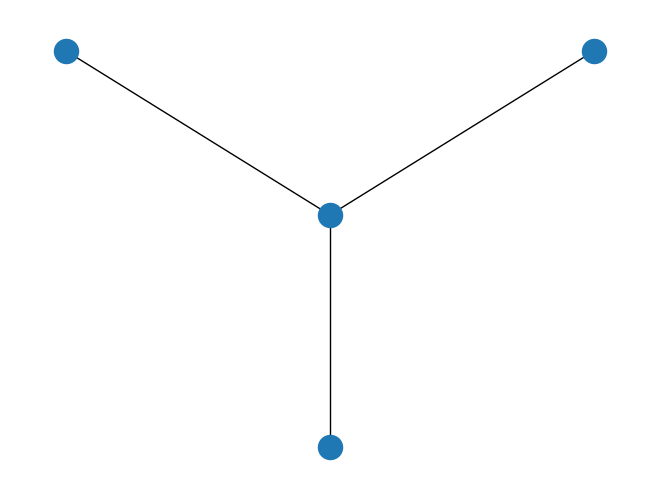

In [252]:
rs = nx.subgraph(R, [3730, 3729.0, 7001.0, 389.0])

nx.draw(rs, nx.get_node_attributes(rs, 'pos'))
